In [1]:
from __future__ import print_function

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from fbprophet import Prophet

%matplotlib inline

In [2]:
data = pd.read_csv("bitstampUSD_1-min_data_2012-01-01_to_2018-01-08.csv")
data['Datetime'] = pd.to_datetime(data['Timestamp'], unit = 's')
data.tail(5)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Datetime
3161052,1515369360,16167.98,16179.65,16154.59,16154.60,2.887541,46660.414604,16159.221330,2018-01-07 23:56:00
3161053,1515369420,16178.07,16178.07,16142.13,16176.43,1.014694,16402.389804,16164.858364,2018-01-07 23:57:00
3161054,1515369480,16131.19,16176.10,16114.30,16114.30,16.897225,272434.236630,16123.016402,2018-01-07 23:58:00
3161055,1515369540,16169.82,16189.43,16114.49,16124.02,6.384757,103222.040090,16166.949978,2018-01-07 23:59:00
3161056,1515369600,16173.98,16176.96,16102.05,16166.78,25.633791,413278.394640,16122.406640,2018-01-08 00:00:00


In [3]:
one_day = 24*60
one_week = 7*one_day
one_year = 52*one_week
df = data[['Datetime','Weighted_Price']].iloc[:-26*one_week:one_day]
df.columns = ['ds', 'y']
df['y'] = np.log(df['y'])
m = Prophet()
m.fit(df);

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/Tom/anaconda/lib/python2.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [4]:
future = m.make_future_dataframe(periods = 365, freq = 'D', include_history=True)
future.tail()

,ds
2374,2018-07-05 19:44:00
2375,2018-07-06 19:44:00
2376,2018-07-07 19:44:00
2377,2018-07-08 19:44:00
2378,2018-07-09 19:44:00


In [5]:
forecast = m.predict(future)
forecast.head()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
0,2011-12-31 07:52:00,1.951932,1.951932,1.951932,1.694489,2.002830,-0.096445,-0.096445,-0.096445,-0.096445,-0.096445,-0.096445,-0.003068,-0.003068,-0.003068,-0.093377,-0.093377,-0.093377,1.855487
1,2012-01-01 07:52:00,1.948345,1.948345,1.948345,1.703521,1.999410,-0.099067,-0.099067,-0.099067,-0.099067,-0.099067,-0.099067,-0.005524,-0.005524,-0.005524,-0.093543,-0.093543,-0.093543,1.849278
2,2012-01-02 07:52:00,1.944758,1.944758,1.944758,1.686534,1.995943,-0.096606,-0.096606,-0.096606,-0.096606,-0.096606,-0.096606,-0.003043,-0.003043,-0.003043,-0.093563,-0.093563,-0.093563,1.848153
3,2012-01-03 07:52:00,1.941171,1.941171,1.941171,1.685847,2.005340,-0.093331,-0.093331,-0.093331,-0.093331,-0.093331,-0.093331,0.000146,0.000146,0.000146,-0.093477,-0.093477,-0.093477,1.847840
4,2012-01-04 07:52:00,1.937584,1.937584,1.937584,1.692325,1.994755,-0.087964,-0.087964,-0.087964,-0.087964,-0.087964,-0.087964,0.005363,0.005363,0.005363,-0.093326,-0.093326,-0.093326,1.849621


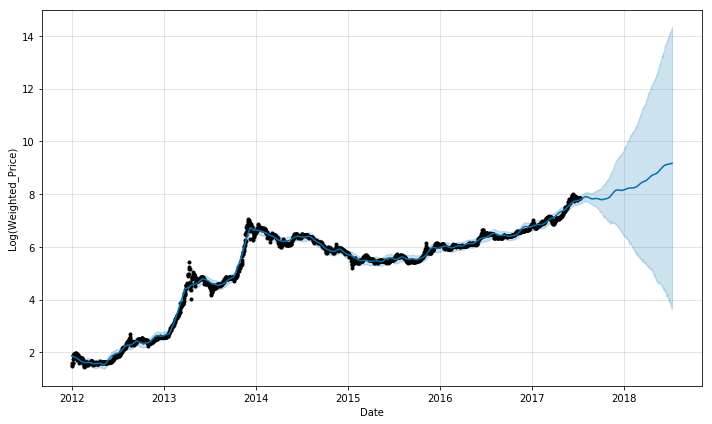

In [6]:
m.plot(forecast,ylabel = 'Log(Weighted_Price)',xlabel='Date');

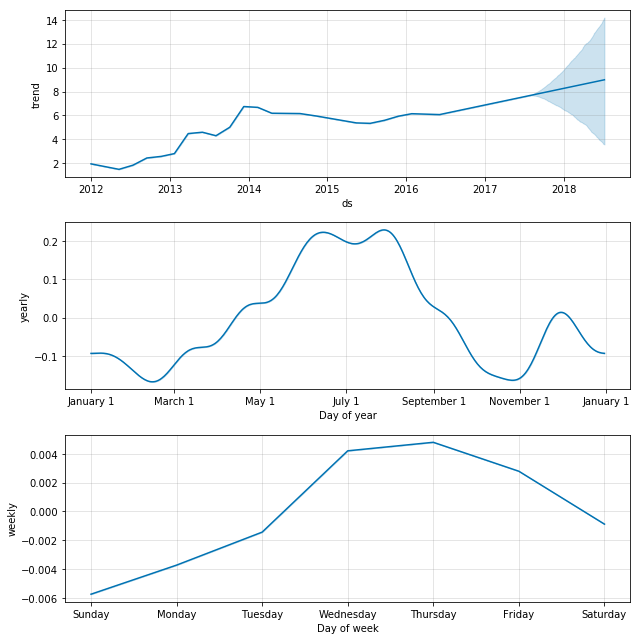

In [7]:
m.plot_components(forecast);

In [18]:
def plot_actual(forecast, data, start, end):

    dummy = forecast[['ds','yhat','yhat_lower','yhat_upper']].set_index('ds')
    dummy['log_yhat'] = dummy['yhat']
    dummy['yhat'] = np.exp(dummy['yhat'])
    dummy['yhat_lower'] = np.exp(dummy['yhat_lower'])
    dummy['yhat_upper'] = np.exp(dummy['yhat_upper'])

    plt.figure(figsize = (10,6))

    d = dummy.loc[start:end]
    d = d.join(data[['Datetime','Weighted_Price']].set_index('Datetime'))
    d['yhat'].plot()
    d['Weighted_Price'].plot(marker = '.', c = 'black')
    plt.fill_between(d.index, d['yhat_lower'], d['yhat_upper'],color='#0072B2', alpha=0.2)
    plt.grid();

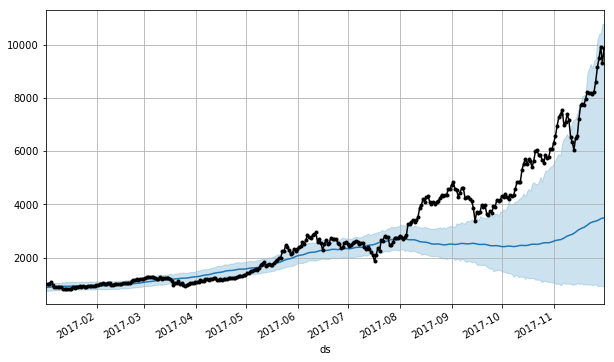

In [19]:
start = pd.datetime(2017,1,1)
end = pd.datetime(2017,12,1)

plot_actual(forecast, data, start, end)

In [10]:
# Train on all available data

df1 = data[['Datetime','Weighted_Price']].iloc[::one_day]
df1.columns = ['ds', 'y']
df1['y'] = np.log(df1['y'])
m1 = Prophet()
m1.fit(df1);

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


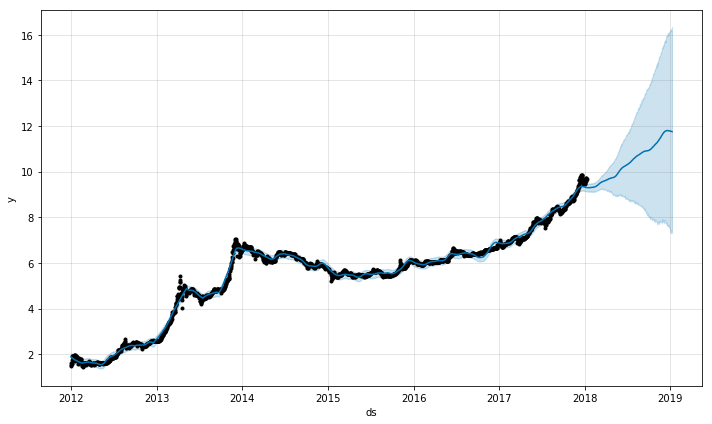

In [12]:
future1 = m1.make_future_dataframe(periods = 365, freq = 'D', include_history=True)
forecast1 = m1.predict(future1)
m1.plot(forecast1);

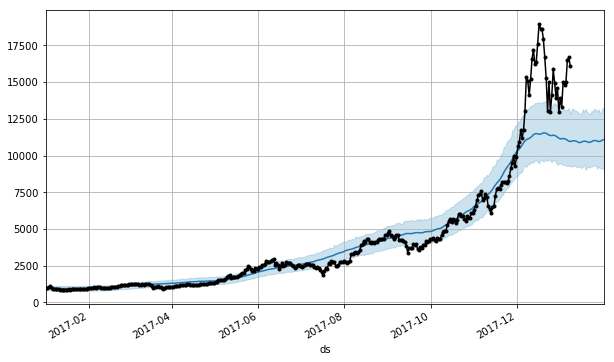

In [16]:
start = pd.datetime(2017,1,1)
end = pd.datetime(2018,2,1)

plot_actual(forecast1, data, start, end)